In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pdb
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline  

from scipy.special import exp10

import warnings
warnings.simplefilter("ignore", UserWarning)


In [2]:
M=200000

np.random.seed(42)
factor=np.random.uniform(2,8,M) #increase in carrying capacity
Nss=np.random.uniform(2000,5000,M) #Nss
hl=np.random.uniform(2,100,M) #half-life
g=np.random.uniform(0.05,0.15,M) #hopping rate gamma
L=np.random.uniform(25,35,M)

mu=np.log(2)/hl #death rate
d=1/(factor) #delta
s=factor-1 #Selective advantage for mutants

a=np.random.normal(0.2, 0.00004,M) # constant (intercept) in the phenomenological equation

experimental=np.random.normal(0.1306, 0.025, M)

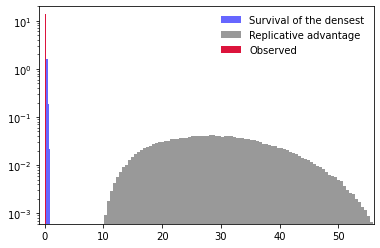

In [3]:
plt.ylim([0.0006,20])
plt.xlim([-1,56])
v=2*L*(1-d)*(mu*g**3)**(0.25)/(Nss**(1/3))+a

plt.yscale("log")

vFK=L*2*np.sqrt(g*(factor-1)*(np.log(2)-mu))


nbins=100
log=False
boo=True

plt.hist(v, density=boo,   log=log,  bins=10, color="blue", alpha=0.6, stacked=boo, label="Survival of the densest"); 
plt.hist(vFK, density=boo, bins=nbins, log=log, alpha=0.4, color="black", stacked=boo, label="Replicative advantage");
plt.hist(experimental, log=log, bins=10,   density=boo,  color="crimson", stacked=boo, label="Observed");


plt.legend(loc="upper right",frameon=False)



plt.show()


In [4]:
pd.DataFrame((experimental, v, vFK)).to_csv("distributions.csv")
